# Solar ANN 

### Load and preprocess data

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

data = pd.read_csv('/Users/ben/Desktop/Senior-project/TheMotherLoad.csv')
data = data.fillna(0)

features = data[['sum', 'temp', 'dew', 'humidity', 'precip', 'windgust', 
            'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy']]

target = data['Solar']

print("Features shape: ", features.shape)
print('Target shape: ', target.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

Features shape:  (87334, 11)
Target shape:  (87334,)


### Build the ANN

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

Epoch 1/200
1747/1747 [==============================] - 4s 2ms/step - loss: 41074.3125 - val_loss: 39413.4805
Epoch 2/200
1747/1747 [==============================] - 3s 2ms/step - loss: 39365.8711 - val_loss: 39307.7539
Epoch 3/200
1747/1747 [==============================] - 3s 2ms/step - loss: 38875.2422 - val_loss: 38290.6914
Epoch 4/200
1747/1747 [==============================] - 3s 2ms/step - loss: 38416.6523 - val_loss: 37647.6133
Epoch 5/200
1747/1747 [==============================] - 3s 2ms/step - loss: 37392.3906 - val_loss: 36489.3125
Epoch 6/200
1747/1747 [==============================] - 3s 2ms/step - loss: 36318.0938 - val_loss: 35526.0664
Epoch 7/200
1747/1747 [==============================] - 3s 2ms/step - loss: 35753.6836 - val_loss: 35466.6016
Epoch 8/200
1747/1747 [==============================] - 3s 2ms/step - loss: 35486.6289 - val_loss: 35155.9062
Epoch 9/200
1747/1747 [==============================] - 3s 2ms/step - loss: 35236.8008 - val_loss: 34896.0977
E

KeyboardInterrupt: 

### Analysis

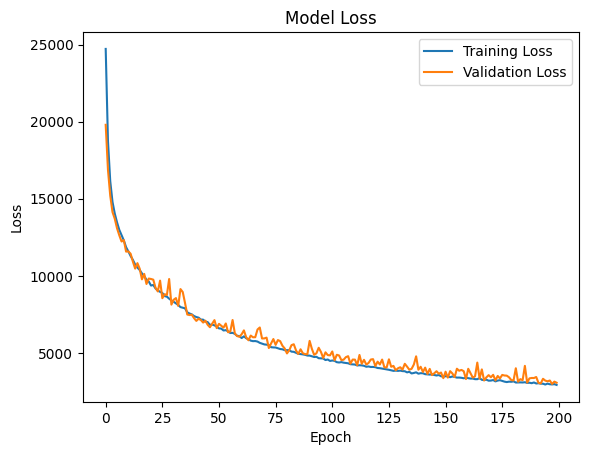

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Make predictions

546/546 [==============================] - 1s 1ms/step
Predicted Solar Energy Ouput: [[ 15.465461]
 [ 90.24357 ]
 [760.6335  ]
 [ 44.120018]
 [369.6171  ]]
Actual Solar Energy Output: [  0. 119. 758.  15.   1.]


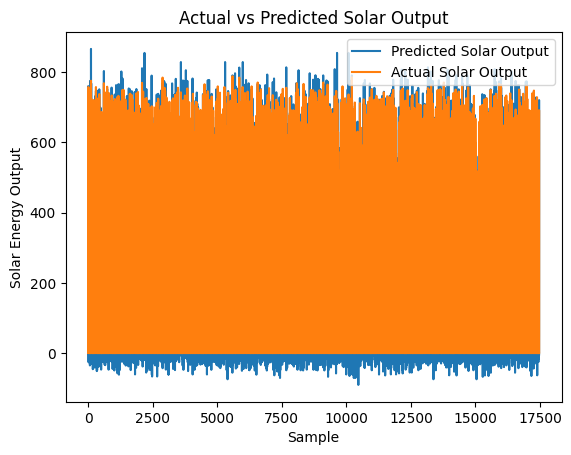

In [19]:
predictions = model.predict(X_test)

print(f'Predicted Solar Energy Ouput: {predictions[:5]}')
print(f'Actual Solar Energy Output: {y_test[:5].values}')

plt.figure()
plt.plot(predictions, label='Predicted Solar Output')
plt.plot(y_test.values, label='Actual Solar Output')
plt.title('Actual vs Predicted Solar Output')
plt.ylabel('Solar Energy Output')
plt.xlabel('Sample')
plt.legend()
plt.show()

### Save model

In [20]:
model.save('SolarModel.h5')